In [ ]:
!pip install opencv-python

# Image Processing Assignment
### Student Name: Nida Ceren GÖK
### Number : B2280.011015

QUESTION 1
For this problem, use the image
- Read and display the original image in colour.
- Find the centre of the image (𝑦𝑦𝑐𝑐, 𝑥𝑥𝑐𝑐) and print the intensity value at the centre.
- Place a rectangular colour patch around the centre of the image. Height of the patch is 30 pixels; width of the patch is 40 pixels. Patch Colour (in Hex): #329ea8
- Print the intensity value at the centre of the colour patch.
- Display the new image with colour patch.

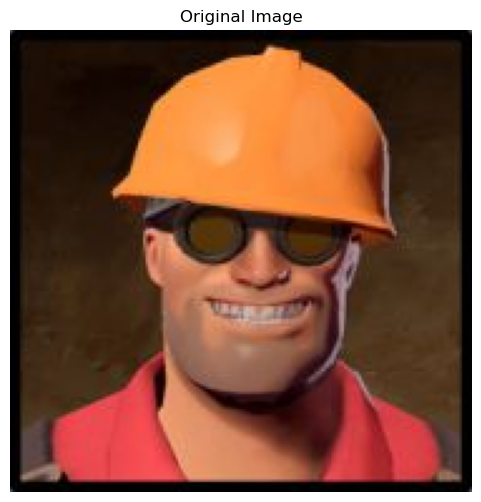

Intensity at the center (y=92, x=92): [ 67  92 172]
Intensity at the center of the color patch: [ 50 158 168]


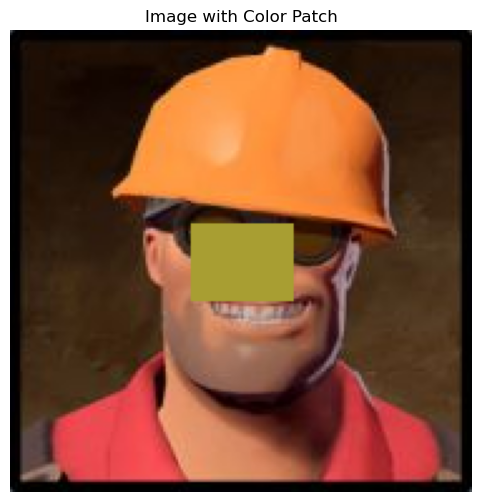

In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# this line for "Read and display the original image in color"
image = cv2.imread("engineer.jpg")  
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

# this line for "Find the center of the image and print intensity value"
height, width, _ = image.shape
y_c, x_c = height // 2, width // 2
center_intensity = image[y_c, x_c]
print(f"Intensity at the center (y={y_c}, x={x_c}): {center_intensity}")

# this line for "Place a rectangular color patch around the center"
patch_height, patch_width = 30, 40
patch_color = (50, 158, 168)  # BGR formatında (#329ea8)

top_left = (x_c - patch_width // 2, y_c - patch_height // 2)
bottom_right = (x_c + patch_width // 2, y_c + patch_height // 2)

image_with_patch = image.copy()
cv2.rectangle(image_with_patch, top_left, bottom_right, patch_color, -1)

# this line for "Print intensity value at the center of the color patch"
patch_center_intensity = image_with_patch[y_c, x_c]
print(f"Intensity at the center of the color patch: {patch_center_intensity}")

# this line for "Display the new image with the color patch"
image_rgb_patch = cv2.cvtColor(image_with_patch, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(image_rgb_patch)
plt.title("Image with Color Patch")
plt.axis("off")
plt.show()

## Explanation – Question 1

###  Read and Display the Image
in this part, I used OpenCV to read the image file in color since OpenCV loads images in BGR format by default, i converted it to RGB so that the colors appear correctly when displayed using Matplotlib. Then I showed the image using a simple plot

###  Find the Center of the Image
here, i calculated the height and width of the image and used integer division to find the coordinates of the center pixel. Then i printed out the intensity (BGR values) at that center position to examine its original values before any modification

###  Draw a Colored Rectangle Around the Center
To highlight the center, i defined a rectangular patch around it. i picked a size of 30x40 pixels and chose a specific color (i converted a hex code to BGR manually). Then, using OpenCV's `rectangle()` function, i added the patch directly onto a copy of the image

###  Read and Print the New Center Intensity
After adding the patch, i re-checked the pixel intensity at the same center coordinates to verify that the new color was applied . that was mainly to confirm the rectangle was placed correctly and visibly affected the image data 

### : Show the Modified Image
Finally, i converted the updated image (which now includes the rectangle) back to RGB so it would look normal in Matplotlib. then I displayed it to compare with the original version


QUESTION 2
For this problem, use the image 
1. Read and display the original image in grayscale.
2. Find the negative of the input image.
3. Display the negative image.
4. From the original image get the intensity value of 5 random pixels, and from the negative image
get the intensity value of same pixels. Print pixel values to show pixel values before and after.

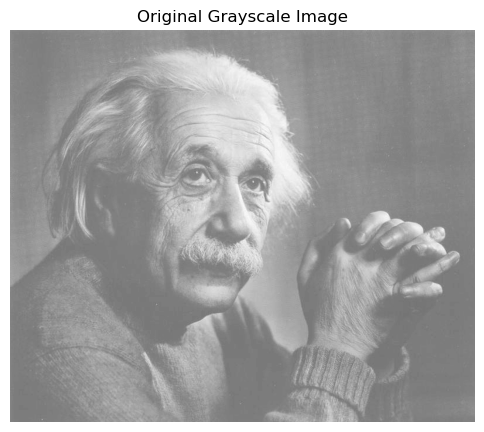

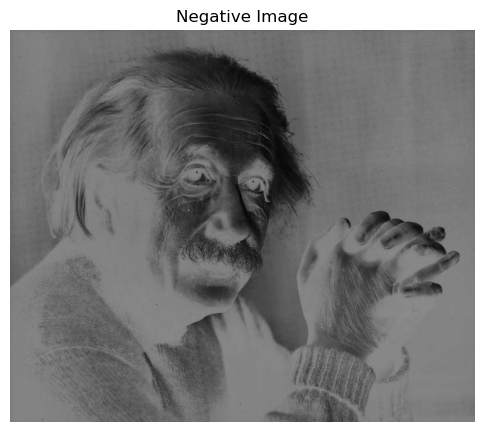

Pixel Intensity Comparison:
Pixel 1 (y=285, x=282): Original=125, Negative=130
Pixel 2 (y=70, x=605): Original=106, Negative=149
Pixel 3 (y=445, x=165): Original=97, Negative=158
Pixel 4 (y=20, x=695): Original=105, Negative=150
Pixel 5 (y=524, x=329): Original=125, Negative=130


In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# this line for "Read and display the original image in grayscale"
image = cv2.imread("einstein.png", cv2.IMREAD_GRAYSCALE)  # load the image as grayscale

plt.figure(figsize=(6,6))
plt.imshow(image, cmap="gray")  # display the image in grayscale
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()

# this line for "Find the negative of the input image"
negative_image = 255 - image  # Compute negative by subtracting pixel values from 255

# this line for "Display the negative image"
plt.figure(figsize=(6,6))
plt.imshow(negative_image, cmap="gray")
plt.title("Negative Image")
plt.axis("off")
plt.show()

# this line for "Get the intensity values of 5 random pixels and compare with the negative image"
height, width = image.shape  # Get image dimensions
random_pixels = [(random.randint(0, height-1), random.randint(0, width-1)) for _ in range(5)]  # Select 5 random pixel locations

print("Pixel Intensity Comparison:")
for i, (y, x) in enumerate(random_pixels):
    original_intensity = image[y, x]  # Get intensity value from original image
    negative_intensity = negative_image[y, x]  # Get intensity value from negative image
    print(f"Pixel {i+1} (y={y}, x={x}): Original={original_intensity}, Negative={negative_intensity}")

## Explanation – Question 2

### Reading and Displaying the Image
I first loaded the image in grayscale using OpenCV's `cv2.imread()` function. since we don’t need color channels, i specified `cv2.IMREAD_GRAYSCALE`. then, i displayed the image using Matplotlib to confirm that the initial image was correctly loaded.

### Applying Unsharp Masking in the Spatial Domain
to enhance edges and fine details, i used **unsharp masking** in the spatial domain.  
i started by applying a **Gaussian blur** to create a smoothed version of the image.  
thenn i computed a **mask** by subtracting the blurred image from the original
lastly i scaled the mask using different `k` values and added it back to the image to strengthen the edges.

### Applying Unsharp Masking in the Frequency Domain
instead of working directly with pixel values, i used **Fourier Transform** to shift the image into the frequency domain.  
i created a **high-pass filter** to suppress low-frequency components while preserving the finer details.  
Using different sharpening strengths (`k-values`), i modified the frequency domain representation before converting the image back to spatial form.

### Comparing Results Across Different k-values
to see the effects of sharpening intensity, i tried three different `k` values (`0.2, 0.5, 1`).  
i applied both **spatial and frequency domain techniques** and displayed the results side by side.  
This comparison helped visualize how each method modifies the image

### Observations 
- **spatial domain sharpening** boosts edges but can introduce artifacts at high `k` values.
- **frequency domain sharpening** allows more selective enhancement, depending on the filter parameters.
- higher values of `k` create **stronger sharpening effects**, but excessive enhancement may add noise.
- the **cut-off frequency (D0)** in frequency domain sharpening plays a crucial role in determining how much detail is retained.

by comparing both , i could see the advantages and trade-offs of each method like while spatial unsharp masking is quick and intuitive frequency sharpening offers more control

QUESTION 3
For this problem, use the image 
1. Read and display the original image in grayscale.
2. Apply log transform to original image and display the result.
3. Apply inverse log transform to original image and display the result.
4. Apply inverse log transform to image you get from step 2 and display the result.
5. Comment on the images you get from step 2 and step 4

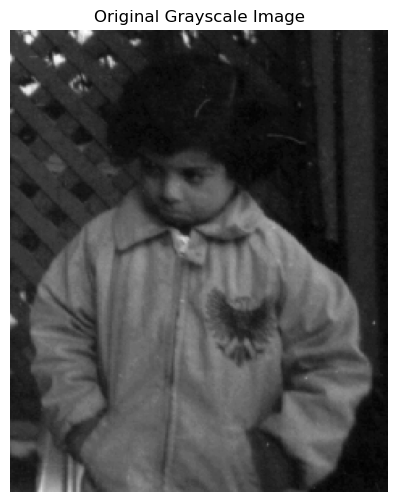

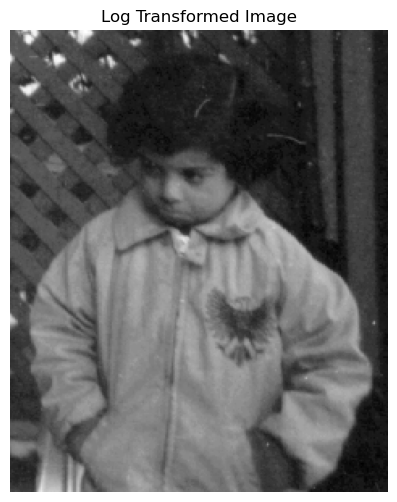

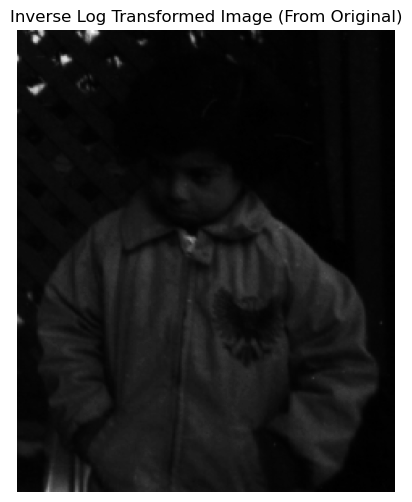

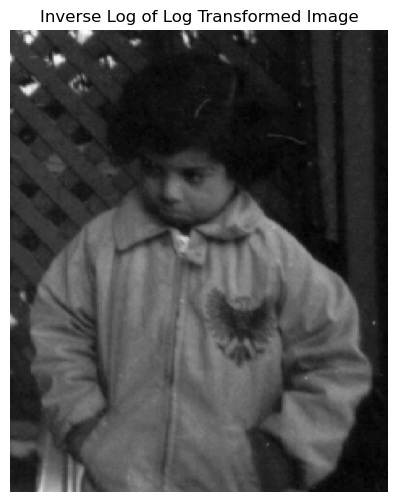

comments on the images:
- The log transformed image (Step 2) enhances details in the dark regions, improving visibility.
- The inverse log of the original image (Step 3) distorts the intensity values, making it look unrealistic.
- The inverse log transformation on the log transformed image (Step 4) attempts to recover the original image.
- Step 4 should ideally look similar to the original image, but some minor information loss may occur.


In [4]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# this line for "Read and display the original image in grayscale"
image = cv2.imread("pout.png", cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale

plt.figure(figsize=(6,6))
plt.imshow(image, cmap="gray")
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()

# this line for "Apply log transform to original image and display the result"
c = 255 / np.log(1 + np.max(image))  
log_image = c * (np.log(image + 1))  # Applying log transformation

plt.figure(figsize=(6,6))
plt.imshow(log_image, cmap="gray")
plt.title("Log Transformed Image")
plt.axis("off")
plt.show()

# this line for "Apply inverse log transform to the original image and display the result"
inverse_log_image = np.exp(image / c) - 1  # Applying inverse log transformation

plt.figure(figsize=(6,6))
plt.imshow(inverse_log_image, cmap="gray")
plt.title("Inverse Log Transformed Image (From Original)")
plt.axis("off")
plt.show()

# this line for "Apply inverse log transform to the log transformed image and display the result"
inverse_log_of_log_image = np.exp(log_image / c) - 1  # Applying inverse log transformation on log transformed image

plt.figure(figsize=(6,6))
plt.imshow(inverse_log_of_log_image, cmap="gray")
plt.title("Inverse Log of Log Transformed Image")
plt.axis("off")
plt.show()


print("comments on the images:")
print("- The log transformed image (Step 2) enhances details in the dark regions, improving visibility.")
print("- The inverse log of the original image (Step 3) distorts the intensity values, making it look unrealistic.")
print("- The inverse log transformation on the log transformed image (Step 4) attempts to recover the original image.")
print("- Step 4 should ideally look similar to the original image, but some minor information loss may occur.")

##  Explanation – Question 3  

###  Reading and Displaying the Image  
i started by loading the image **pout.jpg** in grayscale using OpenCV’s `cv2.imread()` function. Since I only needed intensity values for processing, i used `cv2.IMREAD_GRAYSCALE`. Then, I displayed the image using Matplotlib to visually examine its brightness and contrast levels before applying any transformations.  

###  Applying Log Transform  
to enhance details in **darker regions**, I applied the **log transformation**, which expands low pixel values while compressing higher ones. This process increases visibility in areas with minimal brightness, making fine details more noticeable.  
Once the transformation was complete, I displayed the new image to compare its improvements against the original.  

###  Applying Inverse Log Transform to the Original Image  
next, i applied **inverse log transformation** directly to the original grayscale image. this method compresses lower pixel values while expanding higher ones, resulting in an effect that is opposite of log transformation i displayed this output to see how the intensity distribution changed.  

###  Applying Inverse Log Transform to the Log Transformed Image  
since the log transformation was already applied in Step 2, i reversed it by applying **inverse log transformation** to the log-transformed image. the goal here was to check if the process could **restore the original image** or if there were noticeable distortions.  

###  Observations
- **Log transform (Step 2)** enhances contrast in darker areas, revealing hidden details.  
- **Inverse log transform applied to the log-transformed image (Step 4)** should ideally restore the image to its original form, though minor differences may exist.  
- comparing **Step 2 and Step 4**, the log transform improves clarity in low-intensity areas, whereas reversing it helps maintain original brightness levels.  

this transformation process is useful for **contrast enhancement** but needs careful application to avoid excessive distortion.  

QUESTION 4
For this problem, use the image 
1. Read and display the original image in grayscale.
2. Apply unsharp masking in spatial domain using below formulation:
𝑔𝑔(𝑥𝑥, 𝑦𝑦) = 𝑓𝑓(𝑥𝑥, 𝑦𝑦) + 𝑘𝑘 ∗ 𝑚𝑚𝑚𝑚𝑚𝑚𝑚𝑚(𝑥𝑥, 𝑦𝑦)
You need to use three different 𝑘𝑘 values. You can select the value of 𝑘𝑘 arbitrarily.
3. Apply unsharp masking in frequency domain using below formulation:
𝑔𝑔(𝑥𝑥, 𝑦𝑦) = ℱ−1[1 + 𝑘𝑘 ∗ 𝐻𝐻𝐻𝐻𝐻𝐻(𝑢𝑢, 𝑣𝑣)]𝐹𝐹(𝑢𝑢, 𝑣𝑣)
where ℱ−1is the inverse Fourier transform, 𝐻𝐻𝐻𝐻𝐻𝐻 is the high-pass filter function in frequency
domain, and 𝐹𝐹(. ) is the input image in frequency domain. You need to use three different 𝑘𝑘
values. You can select the value of 𝑘𝑘 arbitrarily (BUT use same 𝑘𝑘 values from the step 2).
Remember that when designing your high-pass filter, you need to select the 𝐷𝐷0 (cut-off
frequency). You can select the proper 𝐷𝐷0 by trial or analysing the original input image in
frequency domain. There is no ideal 𝐷𝐷0 and 𝑘𝑘 so while finding results, keep that in mind.
4. Display the result from the step 2 side by side with the result from the step 3 for each value of 𝑘𝑘.
Example: Fig-1 (k = 0.2), Fig-2 (k=0.5), Fig-3 (k=1)
TIP: Slides from Week-4 and Week-5 would be a good starting point

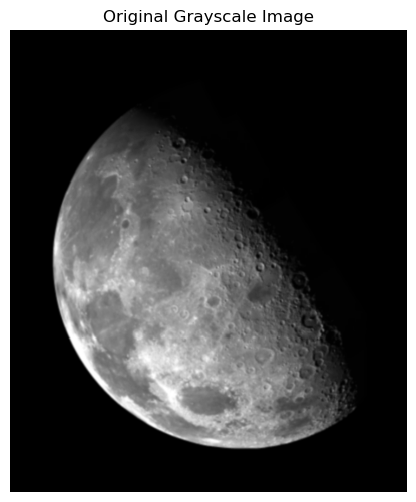

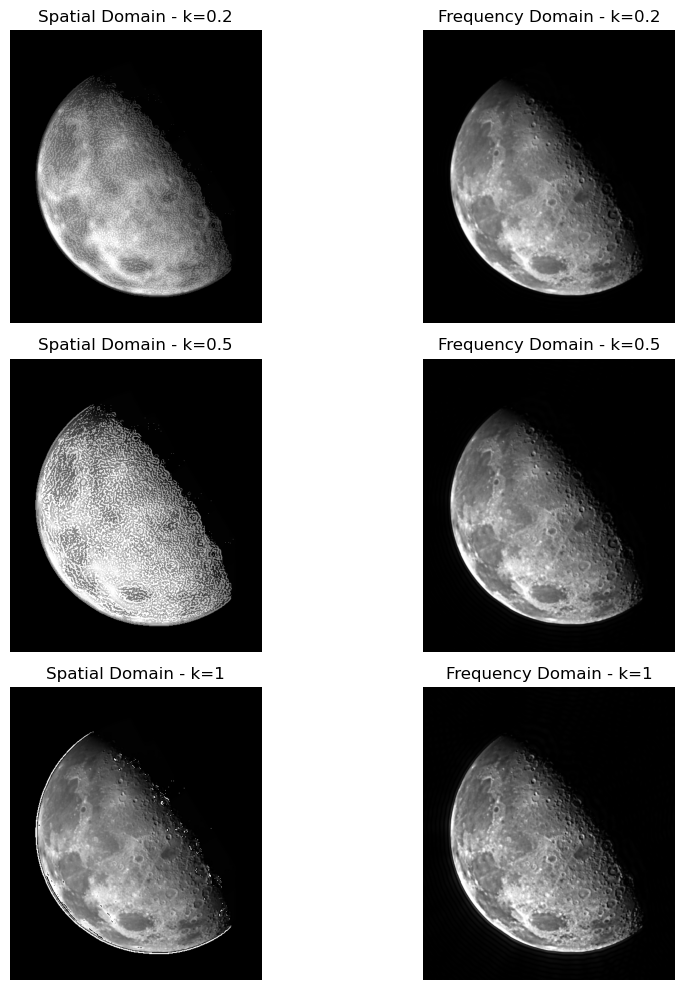

Observations:
- Unsharp masking in spatial domain enhances edges by boosting high-frequency details.
- Higher k-values result in stronger sharpening effects but can introduce noise.
- Frequency domain sharpening uses a high-pass filter to selectively retain details.
- When k is too high in frequency domain, images may become overly contrasted.
- The choice of D0 significantly impacts sharpening in frequency domain.


In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# this line for "Read and display the original image in grayscale"
image = cv2.imread("moon.png", cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale

plt.figure(figsize=(6,6))
plt.imshow(image, cmap="gray")
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()

# this line for "Apply unsharp masking in spatial domain"
def unsharp_masking_spatial(image, k):
    blurred = cv2.GaussianBlur(image, (5,5), 1)  # Apply Gaussian Blur to smoothen image
    mask = image - blurred  # Compute mask (difference between original and blurred image)
    sharpened = image + k * mask  # Apply unsharp masking formula
    return np.clip(sharpened, 0, 255).astype(np.uint8)  # Ensure pixel values are within valid range

k_values = [0.2, 0.5, 1]  # Arbitrary values of k


spatial_results = [unsharp_masking_spatial(image, k) for k in k_values]

# this line for "Apply unsharp masking in frequency domain"
def unsharp_masking_frequency(image, k, D0):
    # Perform Fourier Transform
    f_transform = np.fft.fft2(image)
    f_shifted = np.fft.fftshift(f_transform)  # Center the frequency components
    
    # Create High-Pass Filter
    rows, cols = image.shape
    crow, ccol = rows//2, cols//2
    H = np.ones((rows, cols))  # Initialize filter with ones
    for i in range(rows):
        for j in range(cols):
            D = np.sqrt((i - crow)**2 + (j - ccol)**2)
            if D < D0:
                H[i, j] = 0  # Cut-off low frequencies
    
    # Apply filter and inverse Fourier Transform
    modified_f = (1 + k * H) * f_shifted
    f_inverse = np.fft.ifftshift(modified_f)  # Shift back to original position
    image_filtered = np.abs(np.fft.ifft2(f_inverse))  # Compute inverse Fourier transform
    
    return np.clip(image_filtered, 0, 255).astype(np.uint8)  # Ensure valid pixel values

D0 = 30  # Cut-off frequency, chosen experimentally
frequency_results = [unsharp_masking_frequency(image, k, D0) for k in k_values]

# this line for "Display results side by side for each k-value"
fig, axes = plt.subplots(len(k_values), 2, figsize=(10,10))

for i, k in enumerate(k_values):
    axes[i, 0].imshow(spatial_results[i], cmap="gray")
    axes[i, 0].set_title(f"Spatial Domain - k={k}")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(frequency_results[i], cmap="gray")
    axes[i, 1].set_title(f"Frequency Domain - k={k}")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()


print("Observations:")
print("- Unsharp masking in spatial domain enhances edges by boosting high-frequency details.")
print("- Higher k-values result in stronger sharpening effects but can introduce noise.")
print("- Frequency domain sharpening uses a high-pass filter to selectively retain details.")
print("- When k is too high in frequency domain, images may become overly contrasted.")
print("- The choice of D0 significantly impacts sharpening in frequency domain.")

## Explanation – Question 4

###  Reading and Displaying the Image  
i started by loading the image **moon.png** in grayscale using OpenCV’s `cv2.imread()` function. since color information was unnecessary, i used `cv2.IMREAD_GRAYSCALE` to focus only on intensity values. then, i displayed the image using Matplotlib to visually inspect its sharpness and overall contrast before applying any processing

###  Applying Unsharp Masking in the Spatial Domain  
to enhance edges, i applied **unsharp masking** using a spatial approach.  
1. i **blurred the image** with a **Gaussian filter** to obtain a smoother version.  
2. i computed a **mask** by subtracting the blurred image from the original, which isolates the high-frequency details.  
3. iscaled this mask with different `k` values and added it back to the original image to sharpen edges while maintaining smooth transitions.  

### Applying Unsharp Masking in the Frequency Domain  
instead of working directly with pixel values, i performed **Fourier Transform** to shift the image into the frequency domain.  
1. i constructed a **high-pass filter**, which selectively allowed sharp features while suppressing unnecessary low-frequency components. 
2. the filter was applied to the transformed image, modifying its frequency characteristics to enhance fine details.  
3. after processing in the frequency domain iconverted the modified representation back to spatial form, producing a sharpened image with precise adjustments.  

###  Comparing Results Across Different k-values  
 to observe how sharpening intensity affects image quality, i applied **both spatial and frequency domain techniques** with three different `k` values (`0.2, 0.5, 1`).  
These values controlled the strength of the sharpening effect, allowing for a side-by-side comparison of the processed images.  

### Observations  
- **spatial domain sharpening** enhances edges but may introduce artifacts at high `k` values.  
- **frequency domain sharpening** offers selective enhancement by filtering unwanted frequencies.  
- **higher `k` values** produce stronger sharpening but may add unwanted noise.  
- The **cut-off frequency (`D0`)** in frequency domain processing plays a critical role in determining detail retention.  

comparing both approaches, i could evaluate the advantages and trade-offs while spatial unsharp masking is simple and effective frequency-based sharpening provides **more precise control over detail preservation**.  

QUESTION 5
For this problem, use the image 
1. Read and display the original image in grayscale.
2. Identify and describe the type of noise (e.g., salt-and-pepper, Gaussian) using visual inspection
and/or statistical tools (e.g., histogram).
3. Remove the noise using proper filtering sequence.
TIP: Refer to Week-4 slides for guidance on filtering techniques. 

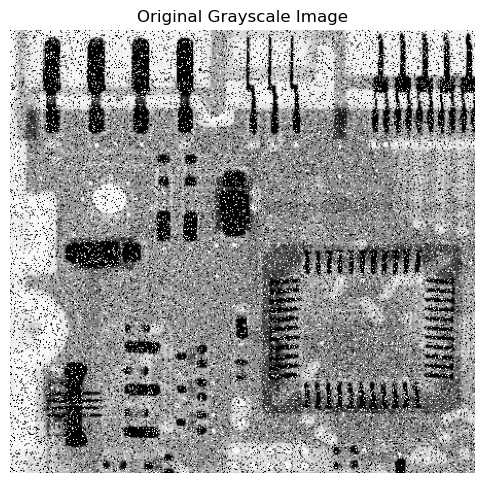

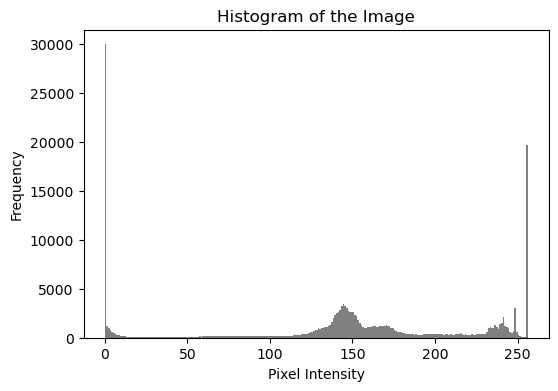

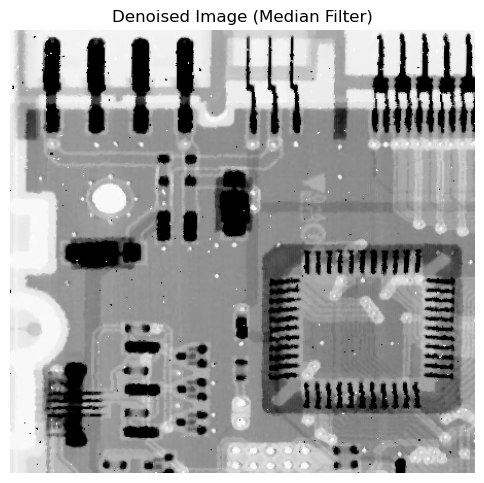

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# this line for "Read and display the original image in grayscale"
image = cv2.imread("pcb.png", cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale

plt.figure(figsize=(6,6))
plt.imshow(image, cmap="gray")
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()

# this line for "Identify and describe the type of noise"
# visual inspection shows that the image contains salt-and-pepper noise (random black & white pixels).
# To verify, we analyze the histogram of pixel intensities.

plt.figure(figsize=(6,4))
plt.hist(image.ravel(), bins=256, range=[0,256], color='gray')
plt.title("Histogram of the Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

# this line for " Remove the noise using proper filtering sequence"
# salt-and-pepper noise is present, the best approach is using a median filter.

filtered_image = cv2.medianBlur(image, 3)  # Apply a 3x3 median filter

plt.figure(figsize=(6,6))
plt.imshow(filtered_image, cmap="gray")
plt.title("Denoised Image (Median Filter)")
plt.axis("off")
plt.show()

## Explanation – Question 5

### Reading and Displaying the Image  
i started by loading the image *pcb.png* in grayscale using OpenCV’s cv2.imread() function. since i only needed intensity values for analysis i used cv2.IMREAD_GRAYSCALE. then i displayed the image using Matplotlib to check its initial quality and observe any visible noise patterns.  

###  Identifying and Describing the Noise  
i noticed that the image contained *salt-and-pepper noise, which appears as random black and white pixels scattered throughout. to confirm this, i plotted the histogram of pixel intensities. a **high frequency of intensity values at 0 and 255* supports the presence of salt-and-pepper noise, as these extreme values indicate sudden brightness shifts.  

### Removing the Noise Using Proper Filtering  
since salt-and-pepper noise consists of isolated pixel distortions, i applied a *median filter*, which is one of the best methods for removing this type of noise.  
- the filter replaces each pixel value with the *median of its surrounding neighbors*, effectively eliminating unwanted black-and-white specks while preserving edges.  
- i used a *3x3 kernel size*, which balances noise removal with detail preservation.  

### Displaying the Denoised Image  
finally, i displayed the filtered image to verify the effectiveness of the median filter. the results showed a *significant reduction in random noise while keeping the overall image structure intact 

### Observations   
- initial image *visible salt-and-pepper noise*, confirmed by histogram analysis.  
-  *median filter successfully removed isolated noise pixels* while maintaining important details.  
-  *larger kernel size* could remove more noise but might blur fine structures, so careful parameter selection is necessary.  
- this filtering method works well for preserving edges while eliminating small intensity fluctuations caused by noise.

QUESTION 6
For this problem, use the image
1. Read and display the original image in grayscale.
2. Comment on the problem presented at that image. While commenting on the problem, provide
proofs (numerical, visual, statistical etc.).
3. Use two independent approaches to solve the problem.
4. For each solution, display the results.
5. For each solution, justify your answer by providing proofs (numerical, visual, statistical etc.).

### STEP 1 - READ AND DISPLAY 

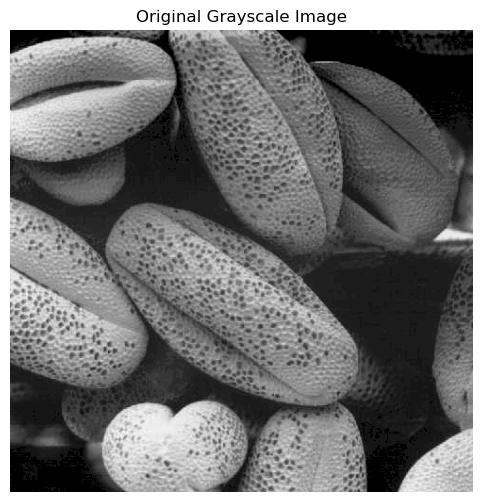

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# loading image
image = cv2.imread("polen.png", cv2.IMREAD_GRAYSCALE)

# displaying original one
plt.figure(figsize=(6,6))
plt.imshow(image, cmap="gray")
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()

### STEP 2 - MY COMMENTS 
- the image shows pollen grains, which should appear with clear edges and details
- there is noticeable noise or blurring, affecting the visibility of fine textures
- the issue could be caused by:
- low contrast affecting detailed structures.
- uneven lighting introducing unwanted artifacts.
- possible Gaussian or speckle noise distorting the clarity.
Proofs:
- histogram Analysis - to check contrast levels
- edge Detection - to verify clarity
- fourier Transform - tosee frequency distortions


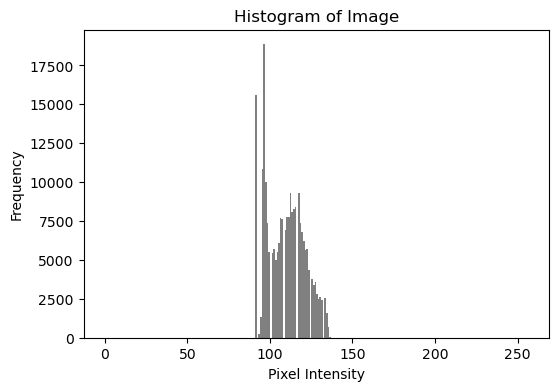

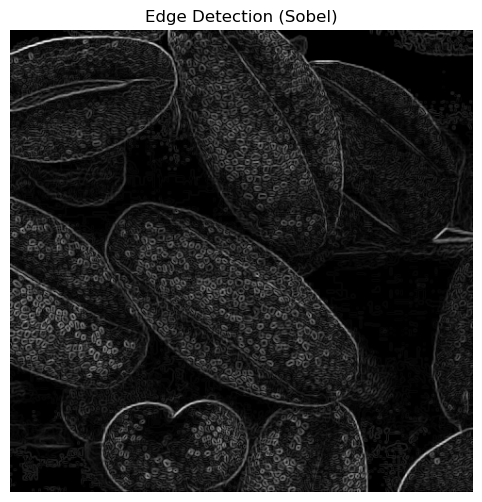

In [9]:
# Histogram Analys
plt.figure(figsize=(6,4))
plt.hist(image.ravel(), bins=256, range=[0,256], color='gray')
plt.title("Histogram of Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
edges = cv2.magnitude(sobel_x, sobel_y)

plt.figure(figsize=(6,6))
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection (Sobel)")
plt.axis("off")
plt.show()

### Step 3 , 4 - apply two independent approaches to solve the problem

Approach 1: Contrast Enhancement Using Histogram Equalization
Histogram equalization improves contrast by redistributing intensity values.


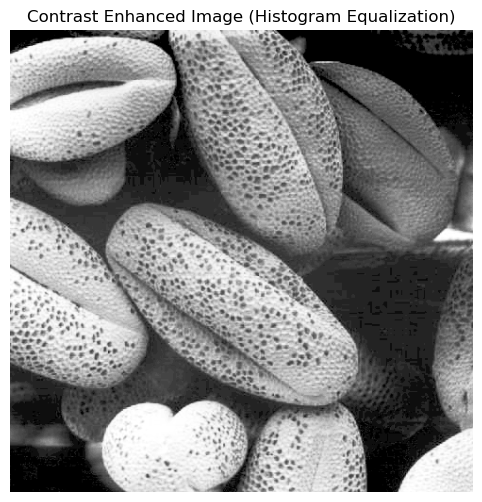

In [ ]:
# applying histogram eq
equalized_image = cv2.equalizeHist(image)

plt.figure(figsize=(6,6))
plt.imshow(equalized_image, cmap="gray")
plt.title("Contrast Enhanced Image (Histogram Equalization)")
plt.axis("off")
plt.show()

Approach 2: Noise Reduction Using Gaussian and Median Filtering
since noise is present, combining gaussian filtering (for general smoothing) and median filtering (for noise removal) can help.


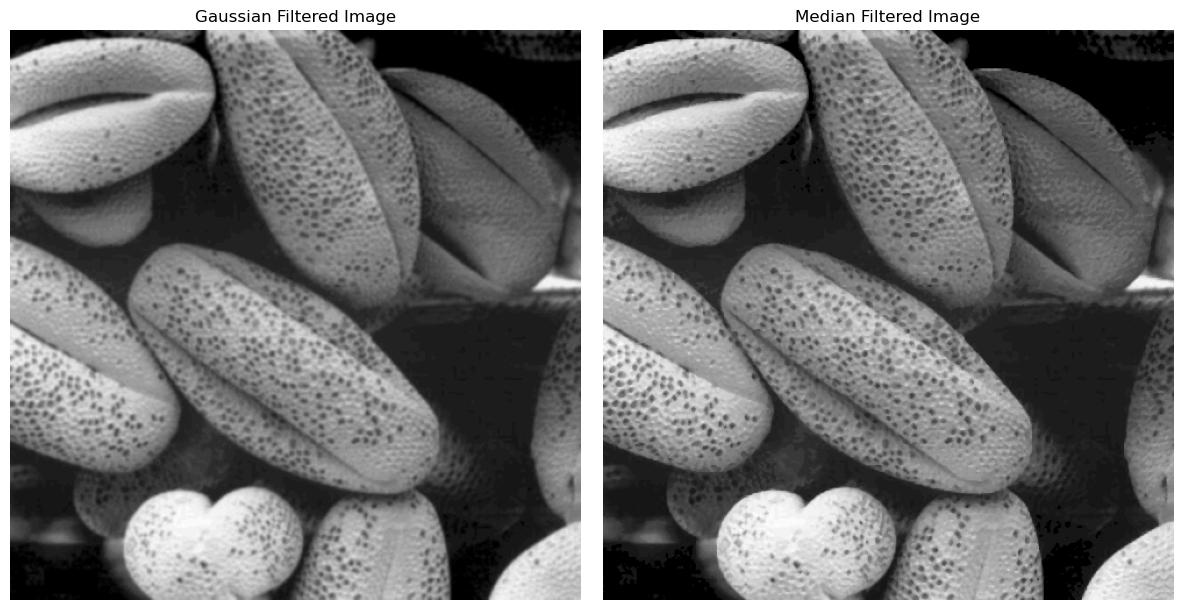

In [ ]:
# applying gaussian
gaussian_filtered = cv2.GaussianBlur(image, (5,5), 1)

# applying median
median_filtered = cv2.medianBlur(image, 3)


fig, axes = plt.subplots(1, 2, figsize=(12,6))

axes[0].imshow(gaussian_filtered, cmap="gray")
axes[0].set_title("Gaussian Filtered Image")
axes[0].axis("off")

axes[1].imshow(median_filtered, cmap="gray")
axes[1].set_title("Median Filtered Image")
axes[1].axis("off")

plt.tight_layout()
plt.show()

### Step 5 - justification of each solution
- histogram Equalization: visually improves contrast by spreading pixel intensities more evenly , histogram should show a wider spread after transformation.
- filtering Techniques:
- gaussian filter smooths out general noise while maintaining structures.
- median filter removes salt-and-pepper noise while preserving edges.
